# IRIS DATASET

In [1]:
#Importing essential libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the dataset 

from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
# Creating a dataframe

df = pd.DataFrame(iris.data , columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
#adding a target column species

df['Species'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
# describing the dataset

df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [8]:
# Checking null values
df.isnull().any()

sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
Species              False
dtype: bool

In [9]:
#Scaling the features

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Species'],
      dtype='object')

In [10]:
# Performing MinMaxScaling

df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']] = scaler.fit_transform(df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']]) 
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0


Text(0.5, 1.0, 'Sepal Length vs Sepal Width')

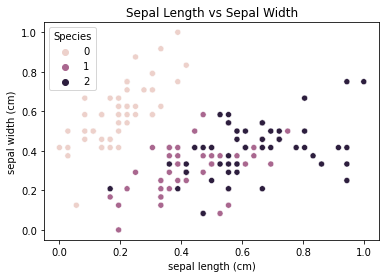

In [11]:
# Visualizing the data 

sns.scatterplot(x = df['sepal length (cm)'] , y = df['sepal width (cm)'] ,hue = df.Species)
plt.title("Sepal Length vs Sepal Width")

Text(0.5, 1.0, 'Sepal Length vs Petal Length')

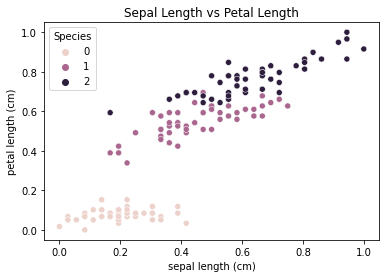

In [12]:
# Visualizing the data 

sns.scatterplot(x = df['sepal length (cm)'] , y = df['petal length (cm)'] ,hue = df.Species)
plt.title("Sepal Length vs Petal Length")

<AxesSubplot:>

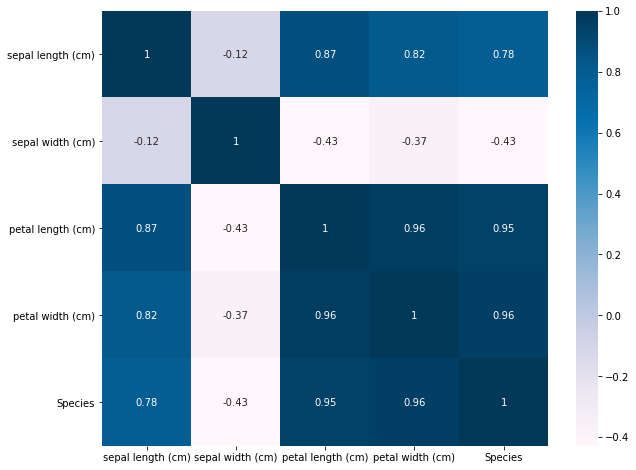

In [13]:
# Checking Correlations

plt.figure(figsize = (10,8))
sns.heatmap(df.corr(),annot= True , cmap ='PuBu')

In [14]:
# Creating X & y
 
X = df.drop('Species',1)
y = df['Species']

In [15]:
# creating X_train, X_test ,y_train, y_test

from sklearn.model_selection import train_test_split
X_train, X_test ,y_train, y_test = train_test_split(X ,y , train_size = 0.7 , random_state = 101 )
X_train, X_test ,y_train, y_test

(     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 13            0.000000          0.416667           0.016949          0.000000
 102           0.777778          0.416667           0.830508          0.833333
 67            0.416667          0.291667           0.525424          0.375000
 34            0.166667          0.458333           0.084746          0.041667
 98            0.222222          0.208333           0.338983          0.416667
 ..                 ...               ...                ...               ...
 63            0.500000          0.375000           0.627119          0.541667
 70            0.444444          0.500000           0.644068          0.708333
 81            0.333333          0.166667           0.457627          0.375000
 11            0.138889          0.583333           0.101695          0.041667
 95            0.388889          0.416667           0.542373          0.458333
 
 [105 rows x 4 columns],
      sepal length (cm)  

In [16]:
# Using RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth = 3 , random_state = 42 , n_jobs = -1 , n_estimators = 8 , min_samples_split= 30)
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.9777777777777777

In [17]:
# Using Decision Trees

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth = 4 , random_state = 0 )
dt.fit(X_train,y_train)
dt.score(X_train,y_train)

1.0

In [18]:
# making predictions

y_pred = dt.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 1, 1, 1, 0, 2, 1, 0,
       1, 1, 1, 1, 1, 2, 0, 0, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 0, 0, 0, 2,
       1])

In [19]:
# Test accuracy
print("\n Test accuracy = {}".format(dt.score(X_test, y_test)))


 Test accuracy = 0.9555555555555556


In [20]:
# Using XGBoost 

from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train,y_train)

print('\n Training accuracy = {}'.format(xgb.score(X_train,y_train)))
print('\n Test accuracy = {}'.format(xgb.score(X_test,y_test)))

[15:52:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Training accuracy = 1.0

 Test accuracy = 0.9777777777777777


In [22]:
# using logistic regression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(n_jobs= -1 , random_state= 42 , )
lr.fit(X_train,y_train)

print('\n Training accuracy = {}'.format(lr.score(X_train,y_train)))
print('\n Test accuracy = {}'.format(lr.score(X_test,y_test)))


 Training accuracy = 0.9238095238095239

 Test accuracy = 0.8888888888888888
